# MOwNiT 

## Laboratorium 4

### Interpolacja

Przed uruchomieniem trzeba zainstalować pakiet:

```julia
Pkg.add("Interpolations")
```

In [1]:
#using Pkg
#Pkg.add("Interpolations")

In [2]:
using Plots

In [3]:
# wylosowanie węzłów interpolacji
xs =  1:1:10
ys = [rand() for x in xs]

10-element Vector{Float64}:
 0.39839814010160257
 0.4911835373322654
 0.9385259697520953
 0.7226400842230394
 0.5121824576439683
 0.9653354083142038
 0.7352888119526907
 0.6952500448789615
 0.3205676340278655
 0.5129827643463075

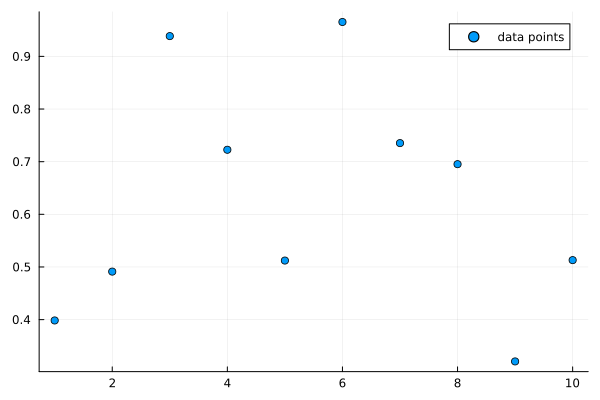

In [4]:
scatter(xs,ys, label="data points")

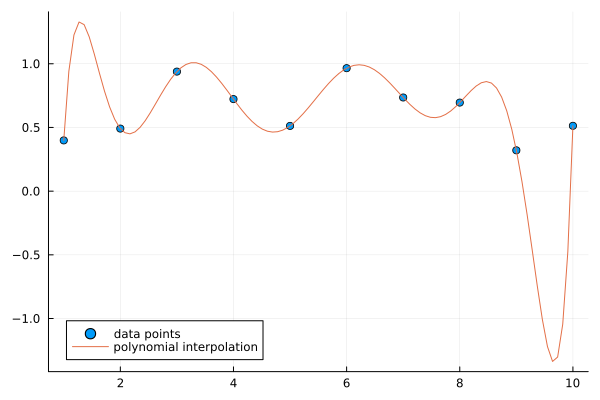

In [5]:
# interpolacja wielomianowa w pakiecie Polynomials
# https://juliamath.github.io/Polynomials.jl/stable/
#import Pkg; Pkg.add("Polynomials")
using Polynomials
f=fit(xs, ys)
plot!(f,  extrema(xs)..., label="polynomial interpolation")

In [6]:
# gęste punkty do rysowania wykresów funkcji interpolujacych
xsf=1:0.01:10

1.0:0.01:10.0

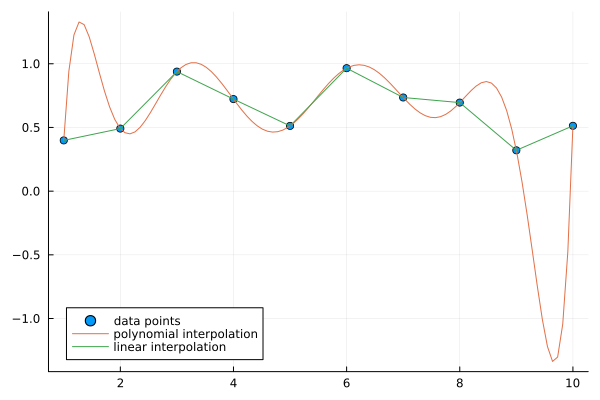

In [7]:
#  interpolacja liniowa z pakietu Interpolations - przykład
using Interpolations
interp_linear = LinearInterpolation(xs, ys)
ysf=[interp_linear(x) for x in xsf]
plot!(xsf,ysf, label="linear interpolation")

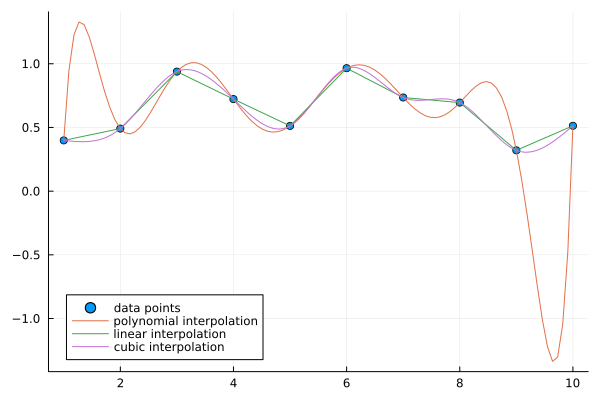

In [8]:
#  interpolacja szescienna 
interp_cubic = CubicSplineInterpolation(xs, ys)
ysf2=[interp_cubic(x) for x in xsf]
plot!(xsf,ysf2, label="cubic interpolation")

In [9]:
#Interpolacja szescienna to BSpline z warunkami brzegowymi Line i OnGrid. 
#Więcej o konfiguracji warunkow brzegowych w
# dokumentacji https://github.com/JuliaMath/Interpolations.jl/blob/master/doc/Interpolations_algebra.pdf
interp_cubic

10-element extrapolate(scale(interpolate(OffsetArray(::Vector{Float64}, 0:11), BSpline(Cubic(Line(OnGrid())))), (1:1:10,)), Throw()) with element type Float64:
 0.39839814010160257
 0.4911835373322654
 0.9385259697520952
 0.7226400842230394
 0.5121824576439683
 0.9653354083142041
 0.7352888119526908
 0.6952500448789616
 0.3205676340278655
 0.5129827643463076

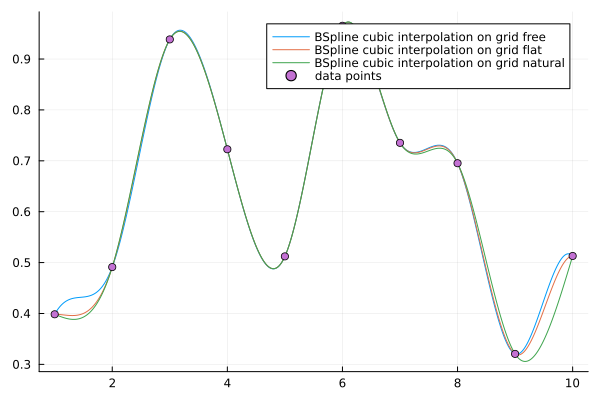

In [10]:
# Przyklad konfiguracji  BSpline-ów
itp = interpolate(ys, BSpline(Cubic(Free(OnGrid()))))
ysf3=[itp(x) for x in xsf]
plot(xsf,ysf3, label="BSpline cubic interpolation on grid free")
itp = interpolate(ys, BSpline(Cubic(Flat(OnGrid()))))
ysf3=[itp(x) for x in xsf]
plot!(xsf,ysf3, label="BSpline cubic interpolation on grid flat")
itp = interpolate(ys, BSpline(Cubic(Natural(OnGrid()))))
ysf3=[itp(x) for x in xsf]
plot!(xsf,ysf3, label="BSpline cubic interpolation on grid natural")

scatter!(xs,ys, label="data points")


### Zadania
1. Napisać własną implementację interpolacji wielomianowej stosując wprost wzór na wielomian interpolacyjny  Lagrange'a .  Przetestować swoją implementację na wylosowanych węzłach interpolacji w wybranym przedziale. Narysować wykres wielomianu interpolacyjnego w tym przedziale wraz z wezlami interpolacji. <b>(1 pkt)</b>

1. Zrobic to samo dla metody  Newtona (metoda ilorazów róznicowych).Narysować wykres wielomianu interpolacyjnego otrzymanego metodą Newtona dla tych samych danych, co w poprzednim punkcie. Zadbać o to, żeby ilorazy wyliczać tylko raz dla danego zbioru wezłow interpolacji, według schematu z pakietu Interpolations http://juliamath.github.io/Interpolations.jl/stable/interpolations/ : 
   1. napisać funkcję `NewtonInterpolation`, która wylicza ilorazy różnicowe i zwraca "obiekt interpolacyjny" `newt`
   1. napisać funkcję która wylicza wartość wielomianu dla obiektu `newt` w punkcie x za pomocą  <b>schematu Hornera dla postaci Newtona </b> <b>(2 pkt)</b>

1. Zastosować interpolację wielomianową z pakietu Polynomials do tych samych danych, co w poprzednich punktach. Porównać wszystkie 3 wyniki interpolacji wielomianowej na jednym wykresie. Co zauważamy? Dlaczego? <b>(1 pkt)</b>

1. Porównać metody poprzez pomiar czasu wykonania dla zmiennej ilości węzłow interpolacji. Uwaga: dodatkowo, dla metody Newtona i pakietu Polynomials należy osobno zmierzyć czas wyliczania wielomianu i osobno czas wyliczania wartości w punkcie. Dokonać pomiaru 10 razy i policzyć wartość średnią oraz oszacować błąd pomiaru za pomocą odchylenia standardowego; wyniki przedstawić na wykresach. <b>(2 pkt)</b>

1. Zaimplementować algorytm Neville’a i sprawdzić (dla kilku wybranych punktów), czy daje te same wartości wielomianu co wybrana interpolacja wielomianowa.<b>(1 pkt)</b>

1. Poeksperymentować z  interpolacją funkcjami sklejanymi (minimum dwie różne funkcje sklejane),  narysować wykresy i porównać z wykresami interpolacji wielomianowej. <b>Zademonstrować  efekt Rungego</b> <b>(1 pkt)</b>. 

## Zadanie 1

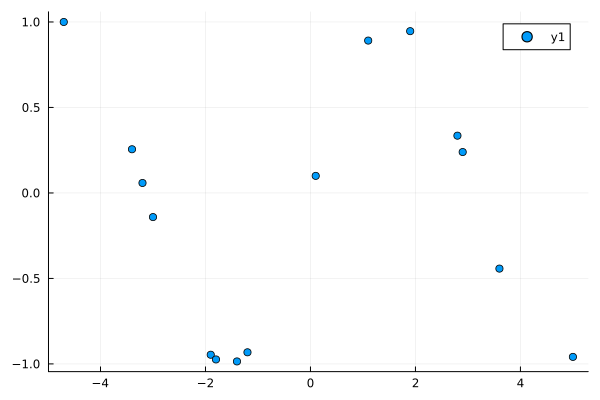

In [75]:
xs = sort([ rand(-5:0.1:5) for _ in 1:15 ])
ys = sin.(xs)
scatter(xs, ys)

In [76]:
# interpolacja lagrangea na 2 punktach
function lagrange_interpolation_on_two_points(xs, ys, x)
    x0 = xs[1]
    x1 = xs[2]
    y0 = ys[1]
    y1 = ys[2]
    P = (x - x1)/(x0 - x1) * y0 + (x - x0)/(x1 - x0) * y1
    return P
end

#interpolacja lagrangea na wielu punktach
function lagrange_interpolation(xs, ys, x)
    n = length(xs)
    P = 0.0
    for i in 1:n
        L = 1.0
        for j in 1:n
            if i != j
                L *= (x - xs[j])/(xs[i] - xs[j])
            end
        end
        P += ys[i] * L
    end
    return P
end

lagrange_interpolation (generic function with 1 method)

In [77]:
range = -5:0.1:5
interp_values = [ lagrange_interpolation(xs, ys, x) for x in range ]

101-element Vector{Float64}:
  0.9587882254421682
  0.9823909358008002
  0.9961439697935256
  0.9999232575641008
  0.99369975361499
  0.9775411530908841
  0.9516122520615525
  0.9161740418509972
  0.8715816205183584
  0.818281000291745
  0.7568048876609538
  0.6877675125517738
  0.6118585840408923
  ⋮
 -0.6877787464508998
 -0.7568256375559673
 -0.8183157624314866
 -0.871635844068463
 -0.9162538231784064
 -0.9517236536669696
 -0.9776889598390519
 -0.9938854160817495
 -1.0001416932817586
 -0.9963787962103758
 -0.9826075892073991
 -0.9589242746631385

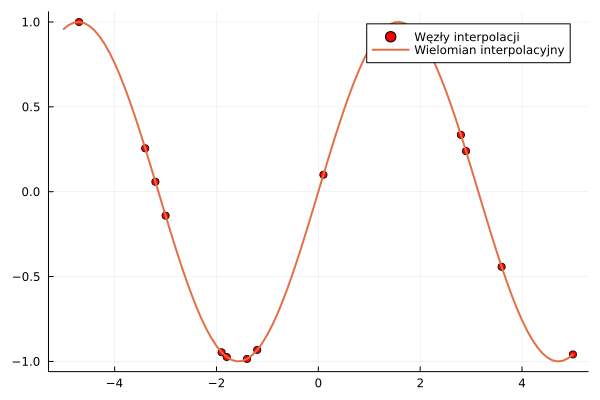

In [78]:
scatter(xs, ys, label="Węzły interpolacji", color=:red)
plot!(range, interp_values, label="Wielomian interpolacyjny", linewidth=2)

### Zadanie 2

### A) Obiekt interpolacyjny Newtona

In [135]:
function NewtonInterpolation(x::Vector{Float64}, y::Vector{Float64})
    n = length(x)
    a = copy(y)
    for j in 2:n
        for i in n:-1:j
            a[i] = (a[i] - a[i-1]) / (x[i] - x[i-j+1])
        end
    end
    return (x = x, a = a)
end

NewtonInterpolation (generic function with 1 method)

### B) Schemat Hornera do obliczania wartości wielomianu

In [136]:
function newton_eval(newt, x_val::Float64)
    n = length(newt.a)
    result = newt.a[end]
    for i in n-1:-1:1
        result = result * (x_val - newt.x[i]) + newt.a[i]
    end
    return result
end

newton_eval (generic function with 1 method)

## Zadanie 3:

### Porównanie z Polynomials

In [137]:
using Polynomials, Plots

### Przykładowe dane

In [138]:
x_nodes = sort(rand(10) * 10)
y_nodes = sin.(x_nodes)

10-element Vector{Float64}:
  0.6864521785965797
  0.9220437629051846
  0.8485236593928622
  0.7002411220841532
 -0.07664126632857224
 -0.8527307362665397
 -0.997779864201344
  0.915173922360125
  0.9670563134663134
 -0.4208452514430806

### Własna metoda Newtona

In [139]:
newt = NewtonInterpolation(x_nodes, y_nodes)
newton_poly(x) = newton_eval(newt, x)

newton_poly (generic function with 1 method)

### Polynomials

In [140]:
poly = fit(x_nodes, y_nodes, length(x_nodes)-1)

Polynomial(-0.036936105462577196 + 1.1384289892459778*x - 0.21014776647743663*x^2 + 0.0057886570277707605*x^3 - 0.08450789550523861*x^4 + 0.03365179096386414*x^5 - 0.004420224689284118*x^6 + 0.00015290985956368974*x^7 + 1.0039913916847645e-5*x^8 - 6.29778008939105e-7*x^9)

### Wykres

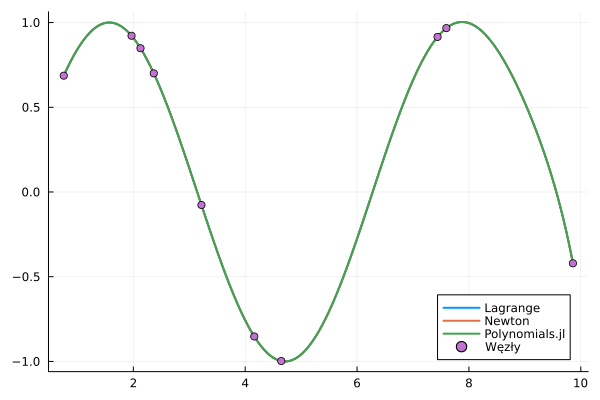

In [141]:
function lagrange_interp(x, x_nodes, y_nodes)
    n = length(x_nodes)
    result = 0.0
    for i in 1:n
        L = prod((x - x_nodes[j]) / (x_nodes[i] - x_nodes[j]) for j in 1:n if j != i)
        result += y_nodes[i] * L
    end
    return result
end

x_vals = [minimum(x_nodes) + (maximum(x_nodes) - minimum(x_nodes)) * (i-1)/(500-1) for i in 1:500]
plot(x_vals, [lagrange_interp(x, x_nodes, y_nodes) for x in x_vals], label="Lagrange", lw=2)
plot!(x_vals, [newton_poly(x) for x in x_vals], label="Newton", lw=2)
plot!(x_vals, [poly(x) for x in x_vals], label="Polynomials.jl", lw=2)
scatter!(x_nodes, y_nodes, label="Węzły")

## Zadanie 4:

In [142]:
#using Pkg
#Pkg.add("BenchmarkTools")
using Statistics, BenchmarkTools

### Funkcje pomocnicze

In [143]:
function benchmark_interpolation(n)
    x = sort(rand(n) * 10)
    y = sin.(x)

    # Newton
    t_newton = @benchmark NewtonInterpolation($x, $y)
    newt = NewtonInterpolation(x, y)
    t_newton_eval = @benchmark newton_eval($newt, 5.0)

    # Polynomials
    t_poly_fit = @benchmark fit($x, $y, length($x)-1)
    poly = fit(x, y, length(x)-1)
    t_poly_eval = @benchmark $poly(5.0)

    return (
        n,
        mean(t_newton).time / 1e6, std(t_newton).time / 1e6,
        mean(t_newton_eval).time / 1e6, std(t_newton_eval).time / 1e6,
        mean(t_poly_fit).time / 1e6, std(t_poly_fit).time / 1e6,
        mean(t_poly_eval).time / 1e6, std(t_poly_eval).time / 1e6,
    )
end


benchmark_interpolation (generic function with 1 method)

### Wykresy

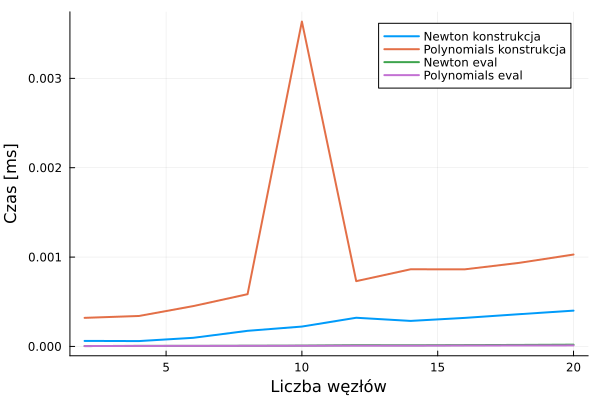

In [144]:
ns = 2:2:20
results = [benchmark_interpolation(n) for n in ns]
times_newton = [r[2] for r in results]
times_poly_fit = [r[6] for r in results]
times_eval = [r[4] for r in results]
times_poly_eval = [r[8] for r in results]

plot(ns, times_newton, label="Newton konstrukcja", lw=2)
plot!(ns, times_poly_fit, label="Polynomials konstrukcja", lw=2)
plot!(ns, times_eval, label="Newton eval", lw=2)
plot!(ns, times_poly_eval, label="Polynomials eval", lw=2)
ylabel!("Czas [ms]")
xlabel!("Liczba węzłów")

## Zadanie 5:

In [145]:
function neville(x_nodes::Vector{Float64}, y_nodes::Vector{Float64}, x::Float64)
    n = length(x_nodes)
    Q = zeros(n, n)
    Q[:, 1] = y_nodes
    for j in 2:n
        for i in j:n
            Q[i, j] = ((x - x_nodes[i-j+1]) * Q[i, j-1] - (x - x_nodes[i]) * Q[i-1, j-1]) / (x_nodes[i] - x_nodes[i-j+1])
        end
    end
    return Q[n, n]
end

neville (generic function with 1 method)

### Sprawdzenie

In [146]:
println("Neville vs Newton w x = 3.5: ", neville(x_nodes, y_nodes, 3.5), " vs ", newton_poly(3.5))

Neville vs Newton w x = 3.5: -0.35075641772906424 vs -0.3507564177290644


## Zadanie 6:

In [147]:
#import Pkg; Pkg.add("Dierckx")
using Dierckx  # splines
g(x) = 1 / (1 + x^2)
x_nodes = [-5 + 10 * (i-1)/(11-1) for i in 1:11]
y_nodes = g.(x_nodes)

11-element Vector{Float64}:
 0.038461538461538464
 0.058823529411764705
 0.1
 0.2
 0.5
 1.0
 0.5
 0.2
 0.1
 0.058823529411764705
 0.038461538461538464

### Efekt Rungego przy interpolacji wielomianowej

In [148]:
poly = fit(x_nodes, y_nodes, length(x_nodes)-1)
spline1 = Spline1D(collect(x_nodes), y_nodes, k=1)  # liniowa
spline3 = Spline1D(collect(x_nodes), y_nodes, k=3)  # kubiczna

Spline1D(knots=[-5.0,-3.0 … 3.0,5.0] (9 elements), k=3, extrapolation="nearest", residual=0.0)

### Wykresy

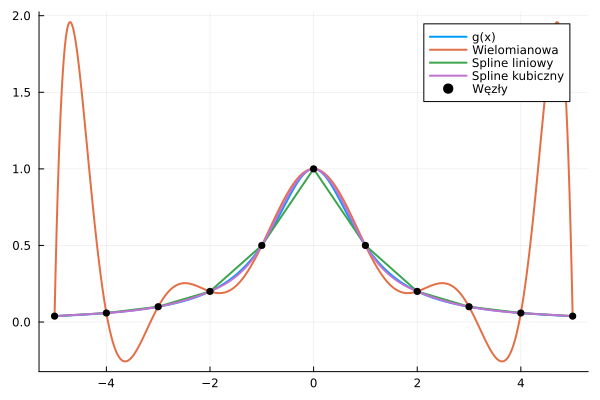

In [150]:
x_vals = [-5 + 10 * (i-1)/(500-1) for i in 1:500]
plot(x_vals, g.(x_vals), label="g(x)", lw=2)
plot!(x_vals, poly.(x_vals), label="Wielomianowa", lw=2)
plot!(x_vals, spline1.(x_vals), label="Spline liniowy", lw=2)
plot!(x_vals, spline3.(x_vals), label="Spline kubiczny", lw=2)
scatter!(x_nodes, y_nodes, label="Węzły", color=:black)